# Groupby, Boxplot, Pivot Table and Date Time

1. [Quick recap](#1)
2. [titanic_df questions](#2)
3. [Survey_df](#3)
4. [Pivot table](#4)
5. [`dateTime` practice](#5)
6. [Boxplot: Definition and motivation](#6)
7. [Working with Boxplot](#7)

#  <b id="Top"> </b>  

<a id='1'></a>

<a class="anchor" id='1'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Quick recap.</h1>

---

>
>* `groupby()` - group according to the columns specified
>
>* `reset_index()`  adds a numerical index
>
>* `pd.to_datetime(df['date'])` - changes the attribute type to datetime
>
>* `pd.DatetimeIndex(df['date']).month` - extracts the month from the datatime attribute
>
>* `apply` - applies a function on each row (axis =0) in the dataframe. Change to (axis = 1) to apply the function on each column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)
>
>* `lambda` - small anonymous function
>
>* `agg` - apply multiple functions at once, one for each specified column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
>
>* `unstack` - unstack the inner-most index onto a column [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
>
>* `droplevel(0, axis = 1)` - drops the highest (first) level in the column index of a multi-index dataframe
>
>* `transpose` - switch between columns and rows
---

<a id='2'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">titanic_df</h1>

In [77]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/titanic.csv'
titanic_df = pd.read_csv(url,encoding='latin1')

In [3]:
titanic_df

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


#### 1.1 What is the average age for male versus female Titanic passengers?

In [102]:
titanic_df[["sex", "age"]].groupby("sex").mean()

,age
sex,
female,30.572702
male,31.581410


In [107]:
titanic_df.groupby(["sex"])['age'].mean()

sex
female    30.572702
male      31.581410
Name: age, dtype: float64

#### 1.2 How many passengers were in each class ?

In [85]:
# titanic_df.groupby("pclass").count()  # Whats the problem here ?

titanic_df.groupby("pclass")["pclass"].count().reset_index(name='counts')
#OR
#titanic_df.groupby(['pclass']).size()

,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


In [61]:
# As dataframe
titanic_df.groupby(['pclass']).size().reset_index(name='counts')

#OR

#titanic_df.groupby(['pclass'])["pclass"].count().reset_index(name='counts')

,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


#### 2. Suggest a solution for the code you wrote to additionally classify by gender.

In [47]:
titanic_df.groupby(['pclass'])['sex'].value_counts()

pclass  sex   
1st     male      179
        female    143
2nd     male      173
        female    107
3rd     male      498
        female    213
Name: sex, dtype: int64

In [65]:
titanic_df.groupby(['pclass','sex'])['sex'].count()

pclass  sex   
1st     female    143
        male      179
2nd     female    107
        male      173
3rd     female    213
        male      498
Name: sex, dtype: int64

#### 3. Suggest a solution for how many survived by class and gender.

In [87]:
titanic_df.groupby(['pclass','sex'])['survived'].sum()

pclass  sex   
1st     female    134
        male       59
2nd     female     94
        male       25
3rd     female     79
        male       58
Name: survived, dtype: int64

In [75]:
#titanic_df.groupby(['pclass','sex'])['survived'].value_counts()

#### 4. Suggest a solution for how many total and average survivors by class

In [93]:
titanic_df.groupby(['pclass'])['survived'].agg(['mean','sum'])

,mean,sum
pclass,,
1st,0.599379,193
2nd,0.425000,119
3rd,0.192686,137


#### Can we convert continuous or interval ratio types of data into a categorical variable ?
#### Think about a way to group by `age`


##### Hint: look for `pd.cut` via internet

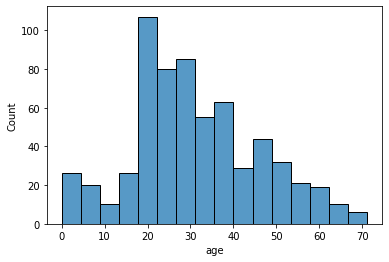

In [100]:
import seaborn as sns
sns.histplot(titanic_df['age']);

In [99]:
titanic_df['age_bins'] = pd.cut(titanic_df['age'], bins = 3, labels = ('young', 'middle_age', 'old' )) # bins also accept intervals such as bins=range(0, 100, 10)

In [9]:
titanic_df.groupby(['age_bins'])['survived'].sum()

age_bins
young         104
middle_age    130
old            47
Name: survived, dtype: int64

###  Did you know ?

#### You can display a graph as a result of grouping directly.

#### Read more online about `plot()`

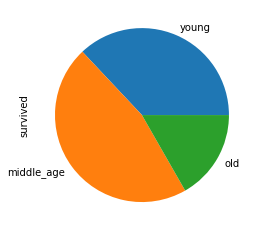

In [10]:
titanic_df.groupby(['age_bins'])['survived'].sum().plot(kind = 'pie');

##### Have we classified the ages correctly?
##### Suggest a way to check this.

In [11]:
age_group_stats = titanic_df.groupby('age_bins')['age'].describe()
age_group_stats

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
young,209.0,15.946969,6.836041,0.1667,13.0,18.0,21.0,23.0
middle_age,325.0,33.596923,6.797829,24.0000,28.0,32.0,39.0,47.0
old,99.0,55.494949,6.255404,48.0000,50.0,54.0,60.0,71.0


##### According to this test we can say yes.

#### Bonus question: Is the following line of code necessary to write before?

In [113]:
titanic_df.dropna(subset=['age'], inplace = True)

> Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the `DataFrame.agg()` method:

In [116]:
titanic_df.agg({"age": ["min", "max", "median", "skew"]})

,age
min,0.166700
max,71.000000
median,30.000000
skew,0.302984


### [▲](#Top)

---
<a id='3'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">More practice : Survey_df</h1>

https://insights.stackoverflow.com/survey

In [13]:
df = pd.read_csv('survey_results_public.csv', index_col='ResponseId')
schema_df = pd.read_csv('survey_results_schema.csv', index_col='qid')

In [14]:
df.shape

(89184, 83)

#### A useful tip for working with a large database `pd.set_option('key', 'value')`

Allows you to set various options to control the behavior and display of pandas objects, such as DataFrames or Series.
It's useful for customizing the way pandas handles data, and it can be especially helpful when working with large datasets or when you want to change the default behavior of pandas for specific tasks.

In [15]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [16]:
df

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...


basic aggregation - combining multiple pieces of data into a single result.
for example:
mean
median
mode

#### 5. What is a typical salary for developers who answered this survey ?
look for 'ConvertedCompYearly' column

In [17]:
df['ConvertedCompYearly'].median()
# remember : median ignores the NaN values

74963.0

What will happen if we run the following code?

In [18]:
#df.median()

Ans: In general, columns containing numeric values will appear and be calculated according to the function we wrote

#### 6. Take a overview of some different stats

In [19]:
df.describe()

,CompTotal,WorkExp,ConvertedCompYearly
count,4.822500e+04,43579.000000,4.801900e+04
mean,1.036807e+42,11.405126,1.031101e+05
std,2.276847e+44,9.051989,6.814188e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,6.300000e+04,5.000000,4.390700e+04
50%,1.150000e+05,9.000000,7.496300e+04
75%,2.300000e+05,16.000000,1.216410e+05
max,5.000000e+46,50.000000,7.435143e+07


##### Look at the average salary among developers; `(ConvertedCompYearly)`, can we conclude from this that it is indeed the average for this profession?

---
#### In one of the survey questions, people were asked if they have a user account on the website;
#### suggest a way to count how many people responded for each of the options provided in the survey.
#### The column the question refers to is called 'SOAccount'

In [20]:
df['SOAccount'] # the desired column

ResponseId
1        NaN
2        Yes
3        Yes
4        Yes
5         No
        ... 
89180    Yes
89181    Yes
89182    NaN
89183     No
89184    Yes
Name: SOAccount, Length: 89184, dtype: object

In [21]:
df['SOAccount'].value_counts()

Yes                        66282
No                         14618
Not sure/can't remember     6952
Name: SOAccount, dtype: int64

###  A question to refresh the memory, 
#### in the database `schema_df` we can use it to retrieve the complete questions asked by the people who filled out the survey.
#### Display the question asked by the name 'SOAccount'

In [22]:
schema_df[schema_df['qname'] == 'SOAccount']['question']

qid
QID101    Do you have a Stack Overflow account?
Name: question, dtype: object

In [23]:
schema_df.query('qname == "SOAccount"')['question']

qid
QID101    Do you have a Stack Overflow account?
Name: question, dtype: object

---
#### Display the value counts for each country 

In [24]:
df['Country'].value_counts()

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: Country, Length: 185, dtype: int64

In [25]:
df['Country'].value_counts(normalize=True)

United States of America                                0.211963
Germany                                                 0.083298
India                                                   0.063940
United Kingdom of Great Britain and Northern Ireland    0.063110
Canada                                                  0.039865
                                                          ...   
Saint Kitts and Nevis                                   0.000011
Marshall Islands                                        0.000011
Samoa                                                   0.000011
Central African Republic                                0.000011
San Marino                                              0.000011
Name: Country, Length: 185, dtype: float64

#### 7. Group the data by `country` and display only the 'United States of America' by using the function `.groupby()`

In [26]:
country_grp = df.groupby(['Country'])

In [27]:
country_grp.get_group('United States of America')

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,N

#### 8. Show the median annual salary by Germany

In [28]:
df.groupby('Country')['ConvertedCompYearly'].median().loc['Germany']

74963.0

## <b id="section_2">Let's now try to answer a question, and by reading the  </b> <b style='color:#F05454'>error  </b> <b>we get we'll try to find the solution.</b> 

#### 9. How many people knew Python from 'United States of America' ?
##### Suggest solving this by using the groupby() function and not using it.

#### 9.1

In [29]:
filt = df['Country'] == 'United States of America'
df.loc[filt]['LanguageHaveWorkedWith'].str.contains('Python').sum()

10062

#### 9.2 Suggest a way to write the code to overcome the error, error, why there is an error in the code in the first place ?

In [30]:
df.groupby(['Country'])['LanguageHaveWorkedWith'].str.contains('Python').sum()

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [33]:
country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum()).sort_values(ascending=False)

Country
United States of America                                10062
Germany                                                  3686
India                                                    2793
United Kingdom of Great Britain and Northern Ireland     2752
Canada                                                   1784
                                                        ...  
Niger                                                       0
Saint Kitts and Nevis                                       0
Guinea-Bissau                                               0
Guinea                                                      0
Central African Republic                                    0
Name: LanguageHaveWorkedWith, Length: 185, dtype: int64

---
#### 10. Does seeing these numbers by itself can help us understand of the percentage of people in each country who knew Python ? 
#### Suggest a way to solve it.

#### Ans: Calculated what percentage of each country reported that they use Python.

In [34]:
country_respondents = df['Country'].value_counts()
country_respondents

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: Country, Length: 185, dtype: int64

In [35]:
country_uses_python = country_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
country_uses_python

Country
Afghanistan                              22
Albania                                  19
Algeria                                  35
Andorra                                   5
Angola                                    4
                                       ... 
Venezuela, Bolivarian Republic of...     42
Viet Nam                                174
Yemen                                     8
Zambia                                   11
Zimbabwe                                 19
Name: LanguageHaveWorkedWith, Length: 185, dtype: int64

In [36]:
python_df = pd.concat([country_respondents, country_uses_python], axis='columns', sort=False)
python_df

,Country,LanguageHaveWorkedWith
United States of America,18647,10062
Germany,7328,3686
India,5625,2793
United Kingdom of Great Britain and Northern Ireland,5552,2752
Canada,3507,1784
...,...,...
Saint Kitts and Nevis,1,0
Marshall Islands,1,0
Samoa,1,1
Central African Republic,1,0


In [37]:
python_df.rename(columns={'Country': 'NumRespondents', 'LanguageHaveWorkedWith': 'NumKnowsPython'}, inplace=True)

In [38]:
python_df

,NumRespondents,NumKnowsPython
United States of America,18647,10062
Germany,7328,3686
India,5625,2793
United Kingdom of Great Britain and Northern Ireland,5552,2752
Canada,3507,1784
...,...,...
Saint Kitts and Nevis,1,0
Marshall Islands,1,0
Samoa,1,1
Central African Republic,1,0


In [39]:
python_df['PctKnowsPython'] = (python_df['NumKnowsPython']/python_df['NumRespondents']) * 100
python_df

,NumRespondents,NumKnowsPython,PctKnowsPython
United States of America,18647,10062,53.960423
Germany,7328,3686,50.300218
India,5625,2793,49.653333
United Kingdom of Great Britain and Northern Ireland,5552,2752,49.567723
Canada,3507,1784,50.869689
...,...,...,...
Saint Kitts and Nevis,1,0,0.000000
Marshall Islands,1,0,0.000000
Samoa,1,1,100.000000
Central African Republic,1,0,0.000000


In [40]:
python_df.loc['Japan']

NumRespondents    362.000000
NumKnowsPython    188.000000
PctKnowsPython     51.933702
Name: Japan, dtype: float64

---

#### 11. Show median and average together for the annual salary by Germany

In [41]:
country_grp['ConvertedCompYearly'].agg(['median', 'mean']).loc['Germany']

median    74963.000000
mean      82457.479093
Name: Germany, dtype: float64

<a id='section4'></a>

### [▲](#Top)
---
<a id='4'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Pivot table:</h1>

#### Pivot tables are especially useful when dealing with large and complex datasets.

A pivot table is a data summarization tool used in spreadsheet software and data analysis tools, like Excel or Pandas in Python.
It allows you to transform and aggregate data from a given dataset into a structured table format, making it easier to analyze and visualize information.

> <ins>**Rows and Columns:**</ins> In a pivot table, you select one or more columns to serve as the "rows" and one or more columns to serve as the "columns." The data in these selected columns will be used to categorize and structure the pivot table.

> <ins>**Values:**</ins> You can specify a numeric column whose values you want to aggregate or summarize. These values can be aggregated using various functions such as sum, average, count, etc.

> <ins>**Aggregation:**</ins> Pivot tables perform aggregation operations on the values within each cell of the table. Common aggregation functions include sum, average, count, minimum, maximum, and more. You can choose the aggregation function that best suits your analysis.

> <ins>**Filters:**</ins> Pivot tables often allow you to apply filters to restrict which data is included in the table. These filters can be based on the values in one or more columns.

> <ins>**Row Totals and Column Totals:**</ins> Pivot tables typically include row totals and column totals, which display the aggregated values for each row and column.

> <ins>**Grand Total:**</ins> A grand total is the sum of all values in the pivot table. It represents the overall summary of the data

In [42]:
# Create a DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 15, 20, 25, 30, 35]}
df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(values='Value', index='Category', aggfunc='sum')

print(df)

  Category  Value
0        A     10
1        B     15
2        A     20
3        B     25
4        A     30
5        B     35


In [43]:
print(pivot_table)

          Value
Category       
A            60
B            75


## <ins>**Filters:**</ins>
Filters allow you to subset the data included in the pivot table based on specific criteria.


In [44]:
# Create a DataFrame

data = {
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'Sales': [100, 150, 200, 250, 300, 350],
    'Date': ['2023-01-01', '2023-01-01', '2023-02-01', '2023-02-01', '2023-03-01', '2023-03-01']
}

df = pd.DataFrame(data)
df

,Product,Category,Region,Sales,Date
0,A,Electronics,North,100,2023-01-01
1,B,Clothing,South,150,2023-01-01
2,A,Electronics,North,200,2023-02-01
3,B,Clothing,South,250,2023-02-01
4,A,Electronics,North,300,2023-03-01
5,B,Clothing,South,350,2023-03-01


In [45]:
# Create a pivot table with 'Category' as rows, 'Region' as columns, and sum of 'Sales' as values
pivot_table = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')

# Apply a filter to only include rows where 'Category' is 'Electronics'
filtered_pivot = pivot_table[pivot_table.index == 'Electronics']
print(pivot_table)
print()
print(filtered_pivot)


Region       North  South
Category                 
Clothing       NaN  750.0
Electronics  600.0    NaN

Region       North  South
Category                 
Electronics  600.0    NaN


## <ins>**Row Totals and Column Totals:**</ins>

In [46]:
# Create a pivot table with 'Category' as rows, 'Region' as columns, and sum of 'Sales' as values
pivot_table = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')

# Add row totals and column totals
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.loc['Total'] = pivot_table.sum()

print(pivot_table)


Region       North  South   Total
Category                         
Clothing       NaN  750.0   750.0
Electronics  600.0    NaN   600.0
Total        600.0  750.0  1350.0


In this example, we calculate row totals by adding a 'Total' row at the end, and column totals by adding a 'Total' column at the end of the pivot table.

## <ins>**Grand Total:**</ins>

The grand total represents the sum of all values in the pivot table, providing an overall summary.

In [47]:
# Create a pivot table with 'Category' as rows, 'Region' as columns, and sum of 'Sales' as values
pivot_table = df.pivot_table(values='Sales', index=['Category'], columns='Region', aggfunc='sum')

# Calculate the grand total
grand_total = pivot_table.values.sum()

print("Grand Total:", grand_total)

Grand Total: nan


In this example, we calculate the grand total by summing all the values in the pivot table, providing the total sales across all categories and regions.

#### But note that we received NaN, `Grand Total` is sensitive to missing values! They must be dealt with first or just use `row totals and column totals`.

## Exercise

In [48]:
data = {
    'Month': ['Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Feb'],
    'Product': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Sales': [1000, 1200, 800, 900, 1500, 1600]
}

df = pd.DataFrame(data)
df

,Month,Product,Sales
0,Jan,A,1000
1,Feb,A,1200
2,Jan,B,800
3,Feb,B,900
4,Jan,C,1500
5,Feb,C,1600


#### 12. What were the sales for Product A in February?

In [49]:
# Create a pivot table with 'Month' as rows and 'Product' as columns, summing 'Sales' as values
pivot_table = df.pivot_table(values='Sales', index='Month', columns='Product', aggfunc='sum')

print(pivot_table) # Partial answer

Product     A    B     C
Month                   
Feb      1200  900  1600
Jan      1000  800  1500


In [50]:
filtered_pivot = pivot_table[pivot_table.index == 'Feb']
print(filtered_pivot) # Full Answer

Product     A    B     C
Month                   
Feb      1200  900  1600


#### 13. Can you find the total sales for each month and the overall total sales across all products?

In [51]:
# Calculate total sales for each month
total_sales_jan = pivot_table.loc['Jan'].sum()
total_sales_feb = pivot_table.loc['Feb'].sum()

# Calculate overall total sales
overall_total_sales = pivot_table.values.sum()

print("Total Sales for January:", total_sales_jan)
print("Total Sales for February:", total_sales_feb)
print("Overall Total Sales:", overall_total_sales)


Total Sales for January: 3300
Total Sales for February: 3700
Overall Total Sales: 7000


### Interactive Pivot Table Using PivotTableJS in Jupyter Notebook

In [52]:
#!pip install pivottablejs
from pivottablejs import pivot_ui

In [53]:
pivot_ui(df,outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')

##### Pivot tables are a powerful tool for data analysis and reporting, allowing you to quickly gain insights into your data by summarizing and aggregating information in a structured format.

### [▲](#Top)
---

<a id='5'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">self dateTime practice.</h1>

#### Read data about Covid cases in Italy on start stage of pandemic using pandas

In [54]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/datasets_italy-covid-daywise.csv'
covid_df = pd.read_csv(url)
covid_df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


#### We will focus on date column

In [55]:
covid_df["date"]

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

#### note that date type is object. let's convert it to pandas datetime
#### for pandas datetime reference and examples: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#### video tutorial: https://www.youtube.com/watch?v=UFuo7EHI8zc

In [56]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

#### now we can extract the year,month,day and weekday properties (and much more )

In [57]:
cuvidDateTimeObj = pd.DatetimeIndex(covid_df.date)
covid_df['year'] = cuvidDateTimeObj.year
covid_df['month'] = cuvidDateTimeObj.month
covid_df['day'] = cuvidDateTimeObj.day
covid_df['weekday'] = cuvidDateTimeObj.weekday
covid_df


,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


#### By using datetime we can present rows of specific dates, for example only August:

In [58]:
covid_df_august = covid_df[covid_df.month == 8]
covid_df_august.tail()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
240,2020-08-27,1366.0,13.0,57640.0,2020,8,27,3
241,2020-08-28,1409.0,5.0,65135.0,2020,8,28,4
242,2020-08-29,1460.0,9.0,64294.0,2020,8,29,5
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0


In [59]:
# print todays date in pandas:
# import pandas as pd
from datetime import date # get python datetime
print(date.today())

2024-01-10


In [60]:
# self learning:.
# 1. calculate total deaths in May at the above 'italy-covid-daywise.csv' url
# 2. python pandas datetime excercises (with solutions):
# https://www.w3resource.com/python-exercises/pandas/datetime/index.php

# Read tirgul 5 on SeaBorn (not matplotlib)

In [61]:











# solution 1
import pandas as pd
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/italy-covid-daywise.csv'
covid_df = pd.read_csv(url)
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
totalDeathsInMay = covid_df[covid_df.month == 5]['new_deaths'].sum()
print('total deaths in May: ',totalDeathsInMay)

total deaths in May:  5658.0


### [▲](#Top)
---

<a id='6'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Boxplot.</h1>

Check the [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for even more styling options

Read more about 

<a id='section1'></a>

<div class="image-container">
  <img src= "https://github.com/Razelbaz1/exercises-package/blob/master/pics/boxplot.png?raw=true"
    alt="Centered Image" width="800" height="200" /> </div>


<div class="image-container">
  <img src= "https://github.com/Razelbaz1/exercises-package/blob/master/pics/boxplot.png?raw=true"
    alt="Centered Image" width="800" height="200" /> </div>


In [62]:
import seaborn as sns  # for creating the graphs
import matplotlib.pyplot as plt  #for reshaping graph size
import numpy as np
import random

## Motivation

In [63]:
# Creating a first DataFrame with the relative distribution of scores in the center and an average of 75
np.random.seed(0)
num_students = 80
grades = np.random.randint(60, 90, num_students)  # grade range 60-89
student_ids = range(1, num_students + 1)
names = ['Student ' + str(i) for i in range(1, num_students + 1)]
df1 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

# Creating a second DataFrame with the distribution of scores at the edges and an average of 75
np.random.seed(1)
grades_low = np.random.randint(40, 60, num_students // 2)  # grade range  40-59
grades_high = np.random.randint(90, 100, num_students // 2)  # grade range  90-99
grades = np.concatenate((grades_low, grades_high))
random.shuffle(grades)  # shuffle grades
df2 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

print("DataFrame 1:", '            '"DataFrame 2:")
pd.concat([df1, df2], axis=1).head(10)

DataFrame 1:             DataFrame 2:


,ID,Name,Grade,ID,Name,Grade
0,1,Student 1,72,1,Student 1,95
1,2,Student 2,75,2,Student 2,90
2,3,Student 3,81,3,Student 3,41
3,4,Student 4,60,4,Student 4,97
4,5,Student 5,63,5,Student 5,97
5,6,Student 6,87,6,Student 6,48
6,7,Student 7,63,7,Student 7,93
7,8,Student 8,67,8,Student 8,46
8,9,Student 9,69,9,Student 9,98
9,10,Student 10,79,10,Student 10,92


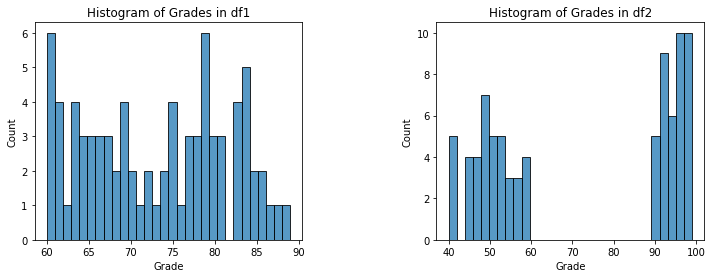

In [64]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.histplot(data = df1, x = 'Grade', ax = ax[0], bins=30)
ax[0].set_title('Histogram of Grades in df1')

sns.histplot(data = df2, x = 'Grade', ax = ax[1], bins=30)
ax[1].set_title('Histogram of Grades in df2')

plt.show()

#### Let's look at the statistics for each table, but we'll want to look at the data so that it's convenient for us to look at both at the same time - we'll add them together.

In [65]:
# Change column name from 'Grade' in-`df1` to 'grade_df1'
df1.rename(columns={'Grade': 'grade_df1'}, inplace=True)

# Change column name from 'Grade' in-`df2` to 'grade_df2'
df2.rename(columns={'Grade': 'grade_df2'}, inplace=True)

In [66]:

# merge the data frames 
merged_df = pd.concat([df1, df2], ignore_index=True)

# print merge df 
print(merged_df)


     ID        Name  grade_df1  grade_df2
0     1   Student 1       72.0        NaN
1     2   Student 2       75.0        NaN
2     3   Student 3       81.0        NaN
3     4   Student 4       60.0        NaN
4     5   Student 5       63.0        NaN
..   ..         ...        ...        ...
155  76  Student 76        NaN       45.0
156  77  Student 77        NaN       97.0
157  78  Student 78        NaN       48.0
158  79  Student 79        NaN       94.0
159  80  Student 80        NaN       51.0

[160 rows x 4 columns]


In [67]:
merged_df.describe().round(3)

,ID,grade_df1,grade_df2
count,160.000,80.000,80.000
mean,40.500,73.100,72.462
std,23.165,8.679,23.235
min,1.000,60.000,40.000
25%,20.750,65.000,49.750
50%,40.500,74.000,74.500
75%,60.250,80.000,95.250
max,80.000,89.000,99.000


In [68]:
#df1.describe()

In [69]:
#df2.describe()

In [70]:
import pandas as pd

# list of grades
grades_to_calculate = [i  for i in range(60,90)]

# new data frame for calculation
results_df = pd.DataFrame({'Grade': grades_to_calculate})

# 
results_df['Frequency'] = [len(df1[df1['grade_df1'] == grade]) for grade in grades_to_calculate]
results_df['Relative Frequency'] = results_df['Frequency'] / len(df1)
results_df['Cumulative Relative Frequency'] = results_df['Relative Frequency'].cumsum()

# final result

In [71]:
# Define a function to highlight specific rows
def highlight_specific_rows(s, rows_to_highlight):
    # Create a boolean mask for rows to highlight
    mask = s.index.isin(rows_to_highlight)
    # Create a DataFrame of styles
    styles = pd.DataFrame('', index=s.index, columns=s.columns)
    # Set the background color for the specified rows
    styles.loc[mask, :] = 'background-color: yellow'
    return styles

# Rows to highlight (in this case, rows 5 and 20)
rows_to_highlight = [5, 20]

# Apply the styling to the DataFrame
styled_results_df = results_df.style.apply(highlight_specific_rows, rows_to_highlight=rows_to_highlight, axis=None)

# Display the styled DataFrame
styled_results_df


,Grade,Frequency,Relative Frequency,Cumulative Relative Frequency
0,60,6,0.075000,0.075000
1,61,4,0.050000,0.125000
2,62,1,0.012500,0.137500
3,63,4,0.050000,0.187500
4,64,3,0.037500,0.225000
5,65,3,0.037500,0.262500
6,66,3,0.037500,0.300000
7,67,3,0.037500,0.337500
8,68,2,0.025000,0.362500
9,69,4,0.050000,0.412500


In [72]:
grade_q1, grade_q3 = df1.grade_df1.quantile(.25), df1.grade_df1.quantile(.75)

grade_upper = grade_q3 + (grade_q3 - grade_q1)*1.5
grade_lower = grade_q1 - (grade_q3 - grade_q1)*1.5
print(grade_q1)
print(grade_q3)
print(grade_upper)
print(grade_lower)

df1[(df1.grade_df1>grade_upper)|(df1.grade_df1<grade_lower)].count()[0]
# almost 3% .. let's consider it as a special pieces

65.0
80.0
102.5
42.5


0

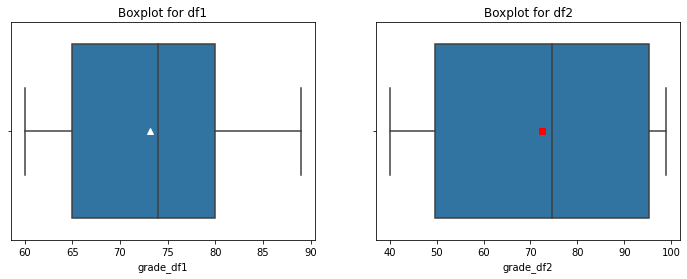

In [80]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for df1
sns.boxplot(x=df1['grade_df1'], ax=axes[0],showmeans=True, meanprops={'marker' : '^','markerfacecolor':'white', 'markeredgecolor':'white'}, meanline=False)
axes[0].set_title('Boxplot for df1')

# Boxplot for df2
sns.boxplot(x=df2['grade_df2'], ax=axes[1],showmeans=True, meanprops={'marker':'s','markerfacecolor':'red', 'markeredgecolor':'red'}, meanline=False)
axes[1].set_title('Boxplot for df2')

# Show the plots
plt.show()

---

### Bonus: manual boxplot construction and definition

In [ ]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [ ]:
blue, orange, green, red = sns.color_palette()[:4]

In [ ]:
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [ ]:
pd.Series(pts).describe()

#### Draw the median

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  #median at 4
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Draw the 25th percentile

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E') 
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E') #25th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Draw the 25th percentile on the other side that now represent the 75th percentile

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')   #75th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Connect the lines and paint

In [ ]:
xvals=np.linspace(2.5, 6, 100)

plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)  #add color
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E') #add upper whisker
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')           #add upper whisker
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E')
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.scatter(12, 0.18, marker="d", s=30, color='#3E3E3E')  #add flier
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [ ]:
#check manual against seaborn plot

plt.figure(figsize=(8,4))
sns.boxplot(pts, color=green, width=0.3)
sns.despine()
plt.xlim(-1, 13)
plt.tight_layout();

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### [▲](#Top)
---

<a id='7'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Working with Boxplot.</h1>

In [31]:
sns.set_style('whitegrid')

NameError: name 'sns' is not defined

In [32]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

NameError: name 'sns' is not defined

In [ ]:
cars.head()

Filter down to only cars with even number of cylinders

In [ ]:
cars = cars[cars.cylinders.isin([4,6,8])]

In [ ]:
sns.boxplot(cars.mpg);

In [ ]:
cars.mpg.describe()

In [ ]:
sns.boxplot(x=cars.origin, y=cars.mpg);

In [ ]:
sns.boxplot(x='origin', y='mpg', data=cars);

### Hue

#### By Cylinders

In [ ]:
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=cars);

#### By Model Year

In [ ]:
cars.model_year.describe()

In [ ]:
cars['newer_model'] = cars.model_year > 76

In [ ]:
sns.boxplot(x='origin', y='mpg', hue='newer_model', data=cars);

## Styling Options

### order

In [ ]:
sns.boxplot(x='mpg', y='origin',   
            data=cars
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            order=['japan', 'europe', 'usa']
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            order=['japan', 'europe', 'usa'],
            hue_order=[True, False]
           );

### color

In [ ]:
sns.boxplot(x='mpg', y='origin',  
            data=cars, 
            color='g'
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            color='g'
           );

### width

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            width=0.5
           ); 

### linewidth

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            linewidth=2.5
           );

### whis

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=1
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=2
           );

### fliersize

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=2
           );

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=10
           );

### showcaps

In [ ]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            showcaps=False
           );

#### In some cases we would like to know starting from which value the boxplot considers the values as outliers.
#### We can know the exact value and even count how many values are considered outliers.
#### Suggest a way to do this and calculate what percentage of the data are outliers.

Here are data on diamonds, show starting from which upper and lower value the values are considered to be outliers according to the __"carat"__ column and show the size of the outliers in percentages

In [ ]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds.head()

In [ ]:
carat_q1, carat_q3 = diamonds['carat'].quantile(0.25), diamonds['carat'].quantile(0.75)

print(f'carat q1: {carat_q1}')
print(f'carat q3: {carat_q3}')



In [ ]:
carat_upper = carat_q3 + (carat_q3 - carat_q1)*1.5
carat_lower = carat_q1 - (carat_q3 - carat_q1)*1.5

print(f'carat_upper:  {carat_upper}')
print(f'carat_lower:  {carat_lower}')

In [ ]:
diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]
# almost 3%